In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv", delimiter=',')
data.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [3]:
uniqueVals = data.nunique(axis=0)
uniqueVals

Year           4
Major         20
University    10
Time          10
Order         10
dtype: int64

In [4]:
input_cols = ["Year", "Major", "University", "Time"]
output_col = "Order"

Year
Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: count, dtype: int64
Major
Chemistry                  640
Biology                    635
Astronomy                  619
Physics                    610
Mathematics                582
Economics                  511
Business Administration    334
Political Science          309
Marketing                  239
Anthropology               146
Finance                    135
Psychology                  76
Accounting                  62
Sociology                   31
International Business      29
Music                       21
Mechanical Engineering      11
Philosophy                   4
Fine Arts                    3
Civil Engineering            3
Name: count, dtype: int64
University
Butler University                                            1614
Indiana State University                                     1309
Ball State University                                        1085
Indiana University-Purdue University Indianapoli

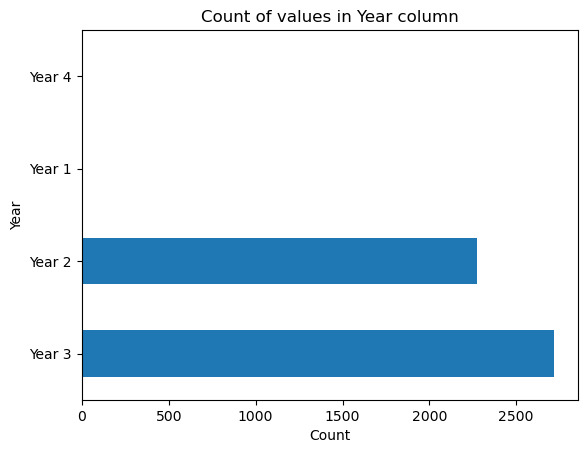

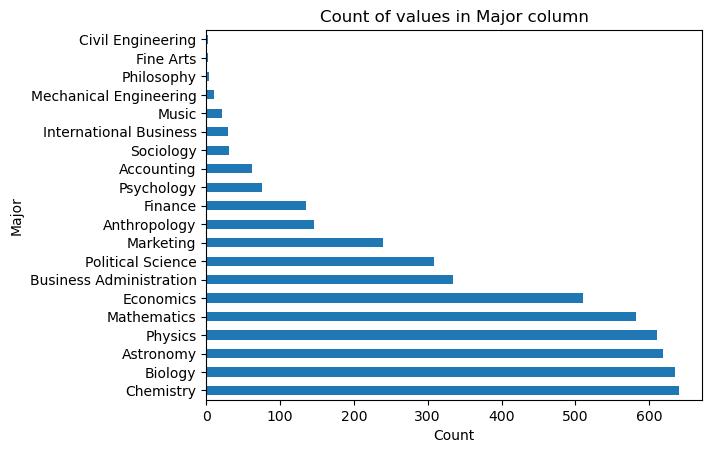

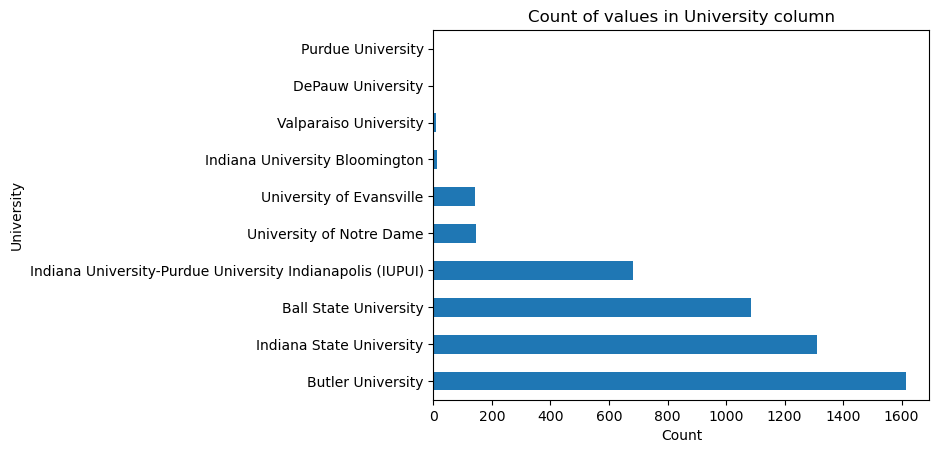

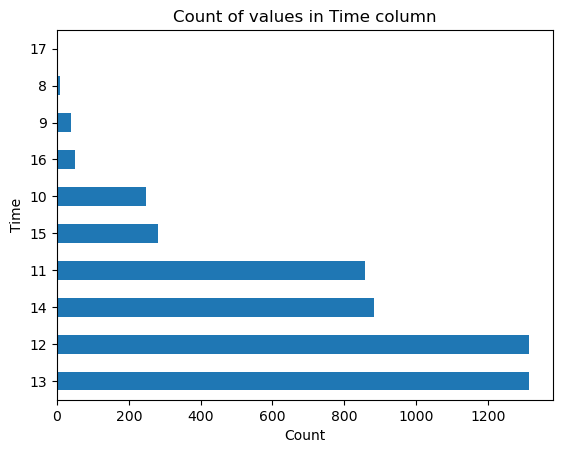

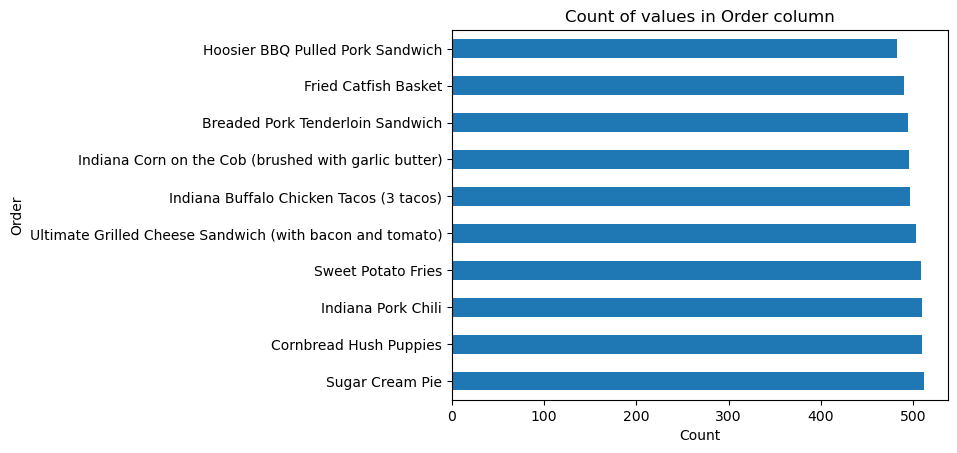

In [104]:
# Visualize different aspects of the data

# See distribution of different values
for i in ['Year', 'Major', 'University', 'Time', 'Order']:
    print(data.value_counts(i))
    plt.figure()
    plt.title(f"Count of values in {i} column")
    data.value_counts(i).plot(kind='barh')
    plt.xlabel("Count")
    plt.savefig(f'graphs/{i}_counts.png')
plt.show()

From the above output, it is clear that these columns have unevenly distributed values. From this, the following could be done to clean the data:
- Drop any rows that contain "Year 1" and "Year 4" as their Year value
- Drop any rows that that contain "Sociology" through "Civil Engineering" (from the values printed above) as their Major value
- Drop any rows that contain "Indiana University Bloomington" through "Purdue University" as their University value
- Drop any rows that contain 16, 9, 8, or 17 as their Time value

I will make an initial run of the model on the unmodified data and later, drop these values to see if the model performs better

In [5]:
year_drops = ["Year 1", "Year 4"]
major_drops = ["Sociology", "International Business", "Music", "Mechanical Engineering", "Philosophy", "Fine Arts", "Civil Engineering"]
university_drops = ["Indiana University Bloomington", "Valparaiso University", "DePauw University", "Purdue University"]
time_drops = [16, 9, 8, 17]

In [36]:
# Encode categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
les = []
def encode_data(X, y):
    global les
    if len(les) != 0:
        les = []
    for col in range(len(X[0]) - 1):
        le = LabelEncoder()
        le.fit(X[:,col])
        les.append(le)
        X[:,col] = le.transform(X[:,col])
    le = LabelEncoder()
    le.fit(y)
    les.append(y)
    y = le.transform(y)
    return X, y

In [37]:
def prepare_data(file, in_cols, out_cols):
    data = pd.read_csv(file, delimiter=',')
    X = data[input_cols].values
    y = data[out_cols].values
    return encode_data(X, y)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    print(rf.score(X_test, y_test))
    return rf

In [41]:
file = "XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv"
X, y = prepare_data(file, input_cols, output_col)
X

array([[1, 16, 3, 12],
       [2, 5, 0, 14],
       [2, 5, 1, 12],
       ...,
       [2, 5, 1, 13],
       [2, 2, 1, 15],
       [1, 7, 8, 15]], dtype=object)

In [42]:
model = train_model(X, y)

0.651


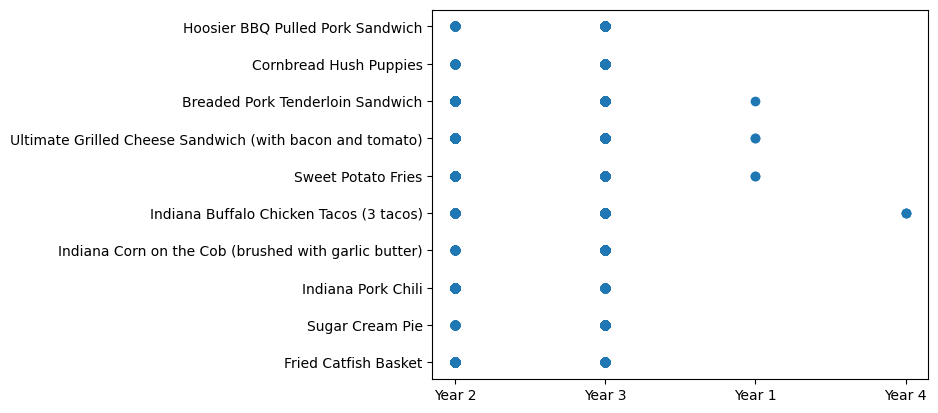

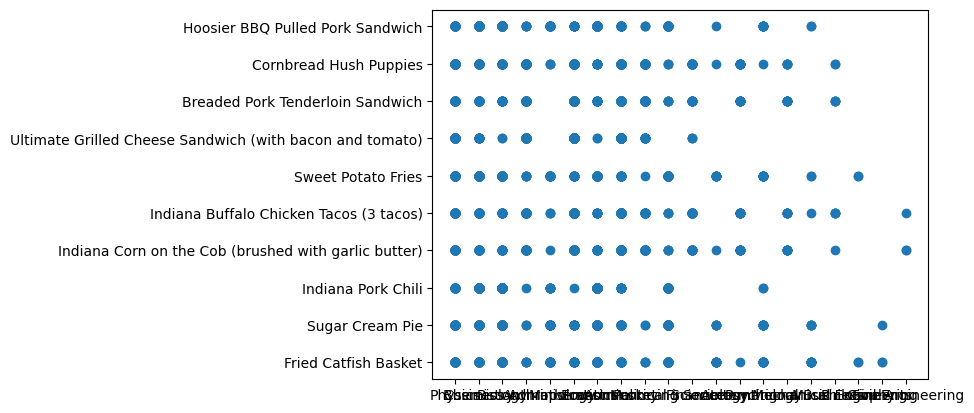

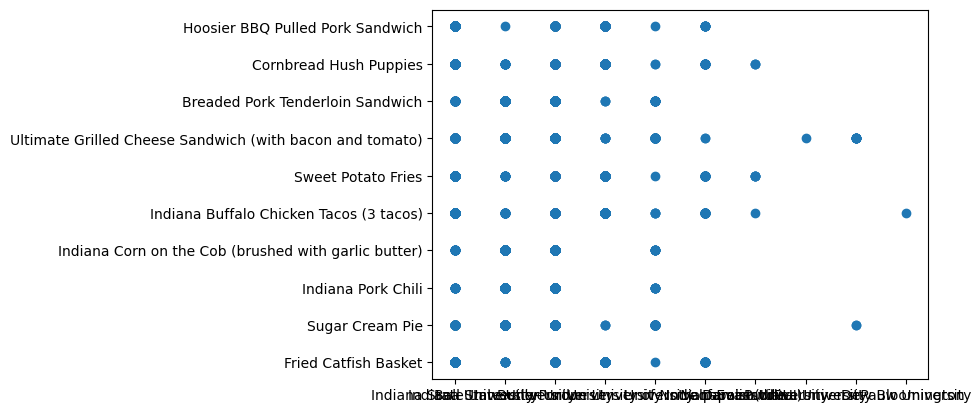

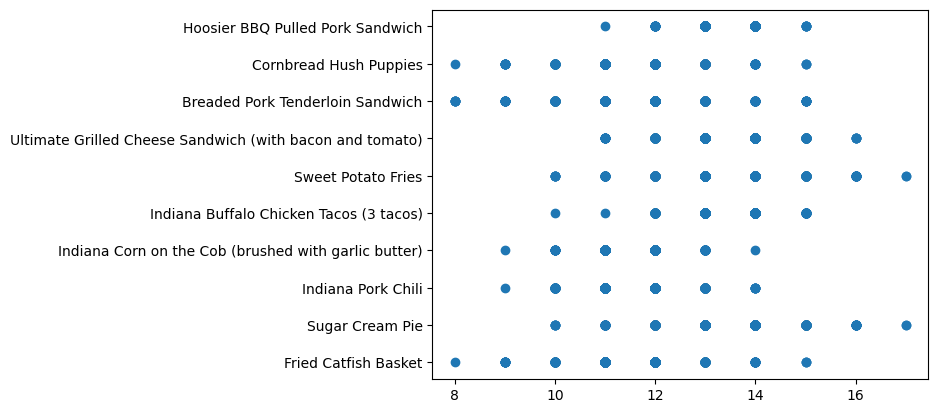

In [44]:
for i in input_cols:
    plt.figure()
    plt.scatter(data[i], data['Order'])
plt.show()

In [97]:
def test_new_input(data, model):
    data = [encoders[i].transform(data[i]) for i in range(len(data) - 1)]
    print(data)

## Dropping unimportant values

In [67]:
cleaned = data
drops = [year_drops, major_drops, university_drops, time_drops]
for i in input_cols:
    counts = cleaned.value_counts(i)
    counts = counts[counts > 50]
    cleaned = cleaned[cleaned[i].isin(list(counts.index))]
cleaned

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...
...,...,...,...,...,...
4995,Year 2,Mathematics,Ball State University,11,Breaded Pork Tenderloin Sandwich
4996,Year 3,Astronomy,Indiana State University,12,Ultimate Grilled Cheese Sandwich (with bacon a...
4997,Year 3,Chemistry,Butler University,13,Sugar Cream Pie
4998,Year 3,Astronomy,Butler University,15,Sugar Cream Pie


In [40]:
# See distribution of different columns
for i in ['Year', 'Major', 'University', 'Time', 'Order']:
    print(cleaned.value_counts(i))

Year
Year 3    2630
Year 2    2144
Name: count, dtype: int64
Major
Chemistry                  628
Biology                    627
Astronomy                  603
Physics                    595
Mathematics                569
Economics                  503
Business Administration    327
Political Science          303
Marketing                  223
Anthropology               140
Finance                    125
Psychology                  71
Accounting                  60
Name: count, dtype: int64
University
Butler University                                            1574
Indiana State University                                     1246
Ball State University                                        1063
Indiana University-Purdue University Indianapolis (IUPUI)     647
University of Notre Dame                                      126
University of Evansville                                      118
Name: count, dtype: int64
Time
13    1297
12    1285
14     864
11     823
15     266
10     239


In [48]:
# X = data[["Year", "Major", "University", "Time"]].drop("Year", axis=1).values
X = cleaned[["Year", "Major", "University", "Time"]].values
y = cleaned["Order"].values
train_model(X, y)

0.6534031413612565


# Hyperparameter Tuning

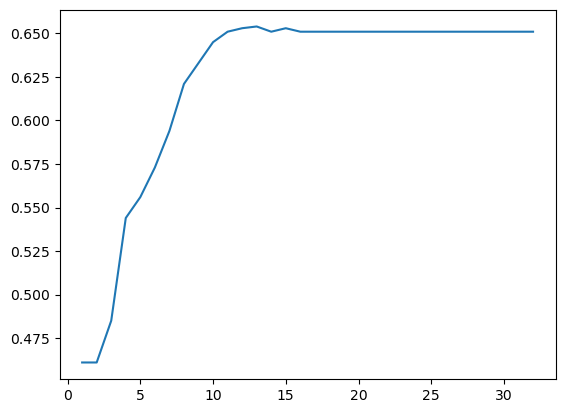

In [108]:
import numpy as np
max_depths = [x for x in range(1, 33)]
depth_scores = []

for depth in max_depths:
    rf = RandomForestClassifier(random_state=42, max_depth=depth)
    rf.fit(X_train, y_train)
    depth_scores.append(rf.score(X_test, y_test))
plt.plot(max_depths, depth_scores)

In [109]:
#At n_estimators = 32, there's marginal improvements onwards
for val in range(len(max_depths)):
    print(max_depths[val], depth_scores[val])
best_max_depth = max_depths[pd.Series(depth_scores).idxmax()]
best_max_depth

1 0.461
2 0.461
3 0.485
4 0.544
5 0.556
6 0.573
7 0.594
8 0.621
9 0.633
10 0.645
11 0.651
12 0.653
13 0.654
14 0.651
15 0.653
16 0.651
17 0.651
18 0.651
19 0.651
20 0.651
21 0.651
22 0.651
23 0.651
24 0.651
25 0.651
26 0.651
27 0.651
28 0.651
29 0.651
30 0.651
31 0.651
32 0.651


13

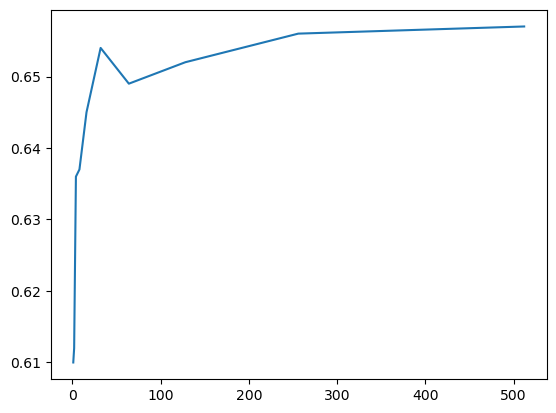

In [110]:
n_estimators = [2**x for x in range(10)]
scores = []

for estimators in n_estimators:
    rf = RandomForestClassifier(random_state=42, n_estimators=estimators)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.plot(n_estimators, scores)

In [111]:
#At n_estimators = 32, there's marginal improvements onwards
for val in range(len(n_estimators)):
    print(n_estimators[val], scores[val])
best_n_estimators = 32

1 0.61
2 0.612
4 0.636
8 0.637
16 0.645
32 0.654
64 0.649
128 0.652
256 0.656
512 0.657


In [112]:
rf = RandomForestClassifier(random_state42, max_depth=best_max_depth, n_estimators=best_n_estimators)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.654

In [113]:
# Calculate feature importance, see if columns should be dropped
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

import time

start_time = time.time()
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.092 seconds


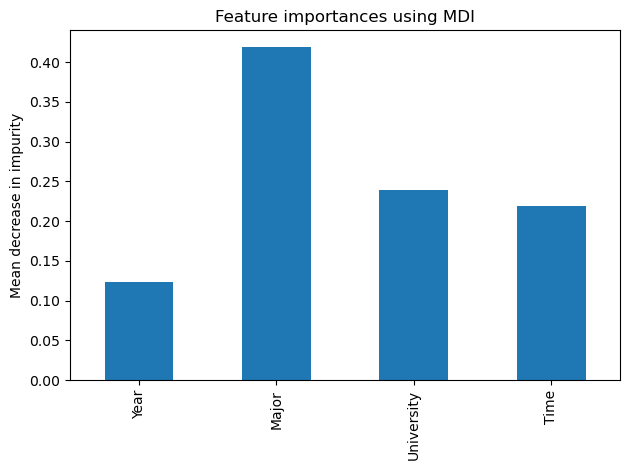

In [114]:
forest_importances = pd.Series(importances, index=data.columns.drop("Order"))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()